In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  
dataset = pd.read_csv('data/network-logs.csv')

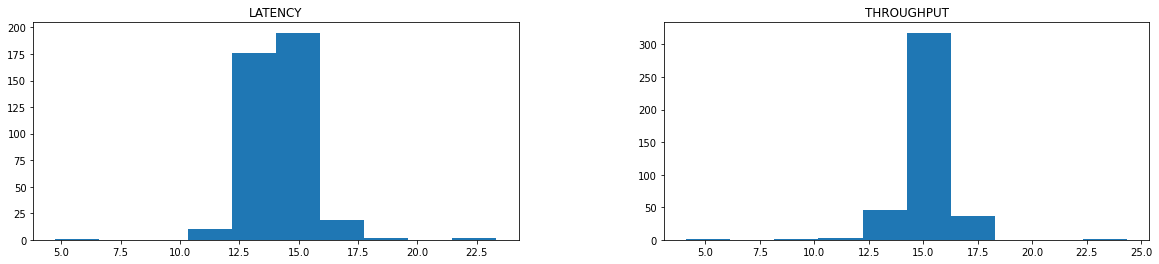

In [95]:
hist_dist = dataset[['LATENCY', 'THROUGHPUT']].hist(grid=False, figsize=(20,4)) #draw the histogram of each feature

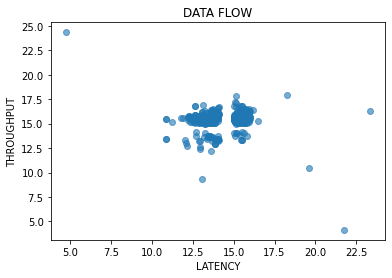

In [97]:
#Plots dataset
data = dataset[['LATENCY', 'THROUGHPUT']].values
targets = dataset['ANOMALY'].values.reshape((data.shape[0], 1))
normal_data=data[np.where(targets==0)[0],:]
plt.scatter(data[:, 0], data[:, 1], alpha=0.6)
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')
plt.show()

In [ ]:
#Local Outlier Factor Method
from sklearn.neighbors import LocalOutlierFactor
cf=  LocalOutlierFactor(n_neighbors=5)
clf.fit(normal_data)
label=clf.predict(data)
outliers = np.where(label ==-1)[0]
# Plot original data.
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Dataset')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')
# Plot the outliers.
plt.scatter(data[outliers, 0], data[outliers, 1], alpha=0.6, c='red', label='Outliers-(Local Outlier Factor)')
# Display plots.
plt.legend()
plt.plot()

/home/mluser/.local/lib/python3.6/site-packages/sklearn/ensemble/_bagging.py:353: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


[]

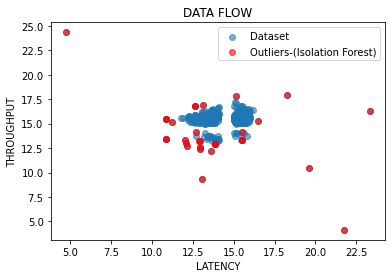

In [98]:
#Local Isolation Forest Method
from sklearn.ensemble import IsolationForest
cf=  IsolationForest(n_estimators=10)
clf.fit(normal_data)
label=clf.predict(data)
outliers = np.where(label ==-1)[0]
# Plot original data.
plt.scatter(data[:, 0], data[:, 1], alpha=0.6, label='Dataset')
plt.xlabel('LATENCY')
plt.ylabel('THROUGHPUT')
plt.title('DATA FLOW')
# Plot the outliers.
plt.scatter(data[outliers, 0], data[outliers, 1], alpha=0.6, c='red', label='Outliers-(Isolation Forest)')
# Display plots.
plt.legend()
plt.plot()